<a href="https://colab.research.google.com/github/yesin25/BankingPeru/blob/main/Marketing_Bancario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Ciencia de datos Randomforest python](https://www.cienciadedatos.net/documentos/py08_random_forest_python.html)

###  1.Librerias a Utilizar

In [ ]:
# Primer Curso de ML
#Importar las librerías necesarias en Python.
import pandas as pd ## Manejo de dataframes o set de datos, trabaja lectura y conexiones de info


import matplotlib.pyplot as plt2 ## Todo lo referente a gráficas y demás.
import matplotlib as plt
%matplotlib inline
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos y demás.
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2.Lectura de los datos

In [ ]:
# Leemos la data de desarrollo de modelos
desarrll = pd.read_csv("/content/drive/MyDrive/Mis proyectos/Course Machine learning advanced (DMC)/Examen competencia Kaggle de la clase 1/AdquisicionHIP_Train.csv")
# Leer el dataset en un dataframe usando pandas

In [ ]:
#Dimension
desarrll.shape

(8486, 24)

In [ ]:
desarrll.head()

,ID,GENERO,ESTADO_CIVIL,EDAD,GRADO_INSTRUCCION,CONDICION_VIVIENDA,NUMERO_DEPENDIENTES,DPTO_DOMICILIO,ANTIGUEDAD_DOMICILIO,TIPO_TRABAJADOR,TIENE_VEHIVULO,LIQUIDEZDISPONIBLE,ACTIVIDAD_ECONOMICA,DEUDAS_NEGATIVAS,T_D_AC_VEN_MA30_3M,RT_N_ENT_M0_3M,ANTIGUEDAD_LABORAL,UTILIDADOPERATIVA,VENTASNETAS,ENDEUDAMIENTOPATRIMONIAL,MARGENOPERATIVO,CICLOFINANCIERO,SEGMENTO,TARGET
0,1,F,S,38,MEDIO/SECUNDARIA,PROPIO,2,LAMBAYEQUE,16,INDEPENDIENTE,False,1139.00,BODEGAS,0,0,0,16,1895.00,7960.0,0.22,26.91,59.67,2,0
1,2,F,S,39,MEDIO/SECUNDARIA,PROPIO,2,LIMA,4,INDEPENDIENTE,False,2877.37,VENTA DE COMIDAS,0,0,0,5,3957.37,1480.0,0.22,29.98,65.21,3,0
2,3,M,C,46,PRIMARIA,PROPIO,3,CAJAMARCA,26,INDEPENDIENTE,False,888.00,OTRAS ACTIVIDADES,0,0,0,5,1338.00,2880.0,0.22,24.77,30.00,1,0
3,4,F,S,23,TECNICO,DE FAMILIAR,0,LA LIBERTAD,16,INDEPENDIENTE,False,2373.00,OTRAS ACTIVIDADES,0,0,0,5,3350.00,1800.0,0.22,72.82,25.80,3,0
4,5,F,C,34,MEDIO/SECUNDARIA,DE FAMILIAR,3,LIMA,16,INDEPENDIENTE,False,1353.06,BODEGAS,0,0,0,5,2003.60,82800.0,0.22,17.27,8.77,3,0


In [ ]:
#Leer los primeros registros.
#train.head(3) # Puedes visualizar la cantidad de registro que requieras
desarrll.columns

Index(['ID', 'GENERO', 'ESTADO_CIVIL', 'EDAD', 'GRADO_INSTRUCCION',
       'CONDICION_VIVIENDA', 'NUMERO_DEPENDIENTES', 'DPTO_DOMICILIO',
       'ANTIGUEDAD_DOMICILIO', 'TIPO_TRABAJADOR', 'TIENE_VEHIVULO',
       'LIQUIDEZDISPONIBLE', 'ACTIVIDAD_ECONOMICA', 'DEUDAS_NEGATIVAS',
       'T_D_AC_VEN_MA30_3M', 'RT_N_ENT_M0_3M', 'ANTIGUEDAD_LABORAL',
       'UTILIDADOPERATIVA', 'VENTASNETAS', 'ENDEUDAMIENTOPATRIMONIAL',
       'MARGENOPERATIVO', 'CICLOFINANCIERO', 'SEGMENTO', 'TARGET'],
      dtype='object')

In [ ]:
# Podemos ver la estructura de los datos
print('Estructura de los datos')
[(col, type(desarrll[col][0])) for col in desarrll.columns]

Estructura de los datos


[('ID', numpy.int64),
 ('GENERO', str),
 ('ESTADO_CIVIL', str),
 ('EDAD', numpy.int64),
 ('GRADO_INSTRUCCION', str),
 ('CONDICION_VIVIENDA', str),
 ('NUMERO_DEPENDIENTES', numpy.int64),
 ('DPTO_DOMICILIO', str),
 ('ANTIGUEDAD_DOMICILIO', numpy.int64),
 ('TIPO_TRABAJADOR', str),
 ('TIENE_VEHIVULO', numpy.bool_),
 ('LIQUIDEZDISPONIBLE', numpy.float64),
 ('ACTIVIDAD_ECONOMICA', str),
 ('DEUDAS_NEGATIVAS', numpy.int64),
 ('T_D_AC_VEN_MA30_3M', numpy.int64),
 ('RT_N_ENT_M0_3M', numpy.int64),
 ('ANTIGUEDAD_LABORAL', numpy.int64),
 ('UTILIDADOPERATIVA', numpy.float64),
 ('VENTASNETAS', numpy.float64),
 ('ENDEUDAMIENTOPATRIMONIAL', numpy.float64),
 ('MARGENOPERATIVO', numpy.float64),
 ('CICLOFINANCIERO', numpy.float64),
 ('SEGMENTO', numpy.int64),
 ('TARGET', numpy.int64)]

In [ ]:
desarrll.dtypes

ID                            int64
GENERO                       object
ESTADO_CIVIL                 object
EDAD                          int64
GRADO_INSTRUCCION            object
CONDICION_VIVIENDA           object
NUMERO_DEPENDIENTES           int64
DPTO_DOMICILIO               object
ANTIGUEDAD_DOMICILIO          int64
TIPO_TRABAJADOR              object
TIENE_VEHIVULO                 bool
LIQUIDEZDISPONIBLE          float64
ACTIVIDAD_ECONOMICA          object
DEUDAS_NEGATIVAS              int64
T_D_AC_VEN_MA30_3M            int64
RT_N_ENT_M0_3M                int64
ANTIGUEDAD_LABORAL            int64
UTILIDADOPERATIVA           float64
VENTASNETAS                 float64
ENDEUDAMIENTOPATRIMONIAL    float64
MARGENOPERATIVO             float64
CICLOFINANCIERO             float64
SEGMENTO                      int64
TARGET                        int64
dtype: object

In [ ]:
desarrll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8486 entries, 0 to 8485
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8486 non-null   int64  
 1   GENERO                    8486 non-null   object 
 2   ESTADO_CIVIL              8486 non-null   object 
 3   EDAD                      8486 non-null   int64  
 4   GRADO_INSTRUCCION         8486 non-null   object 
 5   CONDICION_VIVIENDA        8486 non-null   object 
 6   NUMERO_DEPENDIENTES       8486 non-null   int64  
 7   DPTO_DOMICILIO            8486 non-null   object 
 8   ANTIGUEDAD_DOMICILIO      8486 non-null   int64  
 9   TIPO_TRABAJADOR           8486 non-null   object 
 10  TIENE_VEHIVULO            8486 non-null   bool   
 11  LIQUIDEZDISPONIBLE        8486 non-null   float64
 12  ACTIVIDAD_ECONOMICA       8486 non-null   object 
 13  DEUDAS_NEGATIVAS          8486 non-null   int64  
 14  T_D_AC_V

### 3.Visualización de variables Categoricas

In [ ]:
#Variables Cualitativas
columnas_categoricas = ['GENERO','ESTADO_CIVIL','GRADO_INSTRUCCION','CONDICION_VIVIENDA','DPTO_DOMICILIO','TIPO_TRABAJADOR','TIENE_VEHIVULO','ACTIVIDAD_ECONOMICA', 'TARGET']

In [ ]:
#Variables numericas
columnas_numericas = ['EDAD','NUMERO_DEPENDIENTES','ANTIGUEDAD_DOMICILIO','LIQUIDEZDISPONIBLE','DEUDAS_NEGATIVAS','T_D_AC_VEN_MA30_3M','RT_N_ENT_M0_3M','ANTIGUEDAD_LABORAL','UTILIDADOPERATIVA', 'VENTASNETAS', 'ENDEUDAMIENTOPATRIMONIAL',
       'MARGENOPERATIVO', 'CICLOFINANCIERO', 'SEGMENTO']

In [ ]:
columnas_numericas

['EDAD',
 'NUMERO_DEPENDIENTES',
 'ANTIGUEDAD_DOMICILIO',
 'LIQUIDEZDISPONIBLE',
 'DEUDAS_NEGATIVAS',
 'T_D_AC_VEN_MA30_3M',
 'RT_N_ENT_M0_3M',
 'ANTIGUEDAD_LABORAL',
 'UTILIDADOPERATIVA',
 'VENTASNETAS',
 'ENDEUDAMIENTOPATRIMONIAL',
 'MARGENOPERATIVO',
 'CICLOFINANCIERO',
 'SEGMENTO']

In [ ]:
import matplotlib.pyplot as plt ## Todo lo referente a gráficas y demás.
#import matplotlib as plt

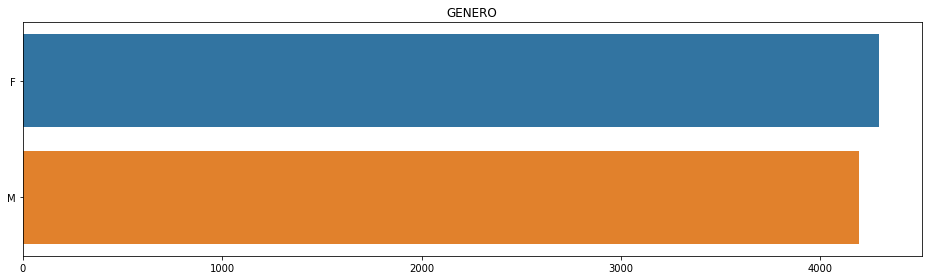

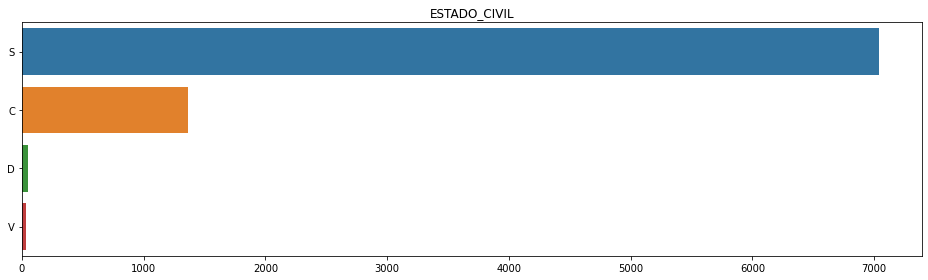

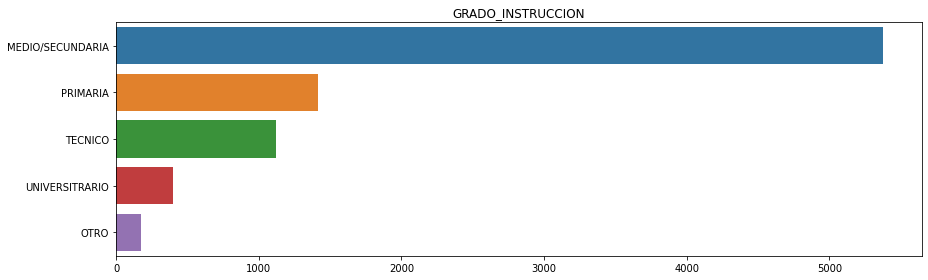

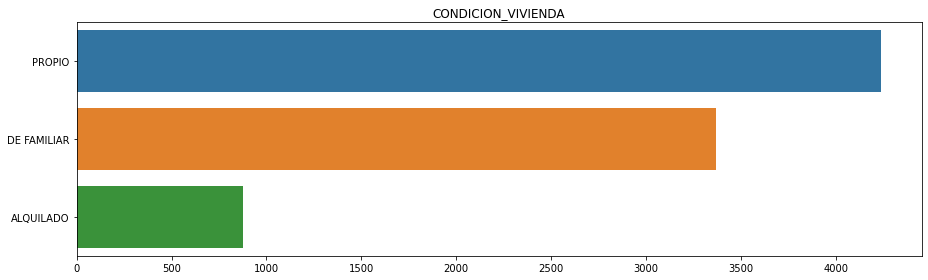

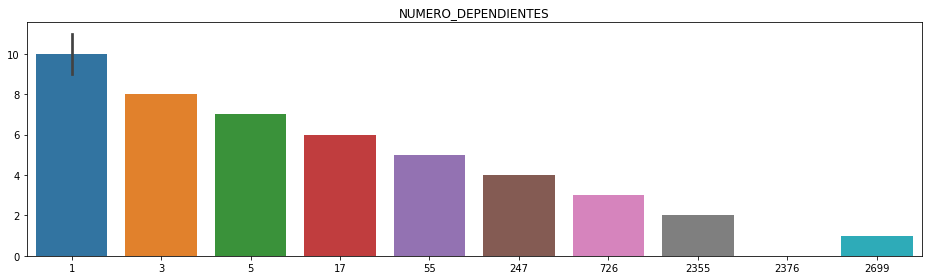

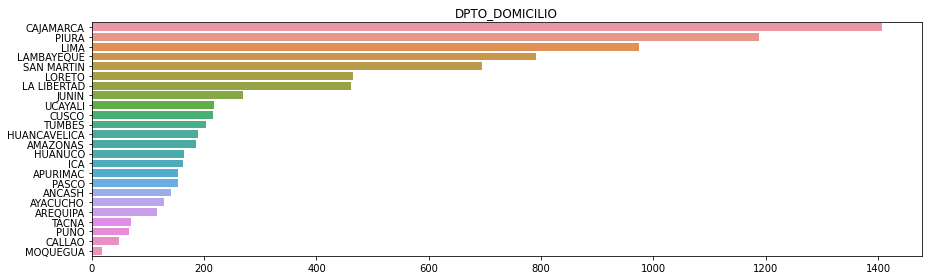

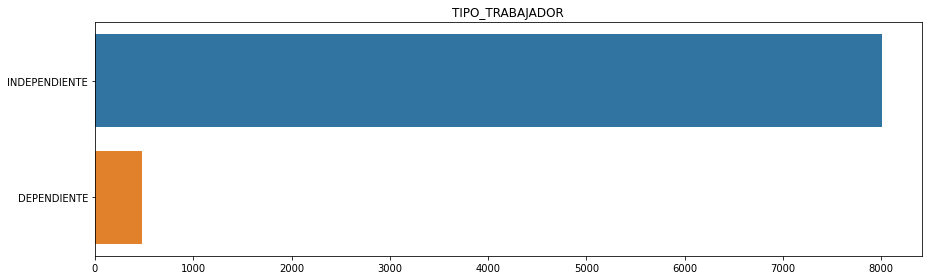

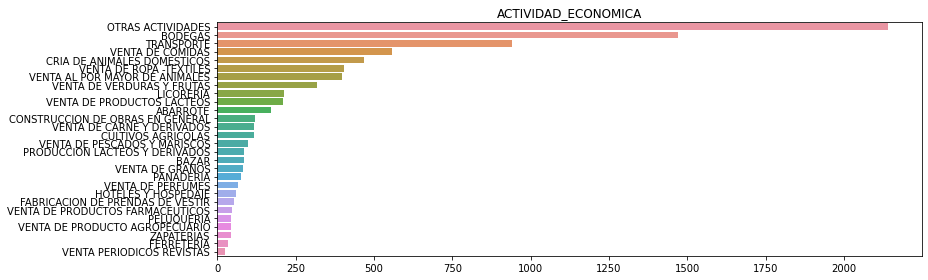

In [ ]:
# No olvidemos separar las variables cualitativas para poder trabajarlas eficientemente
variables_categoricas = ["GENERO","ESTADO_CIVIL","GRADO_INSTRUCCION","CONDICION_VIVIENDA","NUMERO_DEPENDIENTES","DPTO_DOMICILIO","TIPO_TRABAJADOR","ACTIVIDAD_ECONOMICA"]
for col in variables_categoricas:
    plt.figure(figsize=(13,4))
    sns.barplot(desarrll[col].value_counts().values, desarrll[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()
plt.show()

In [ ]:
desarrll.isnull().sum()

ID                          0
GENERO                      0
ESTADO_CIVIL                0
EDAD                        0
GRADO_INSTRUCCION           0
CONDICION_VIVIENDA          0
NUMERO_DEPENDIENTES         0
DPTO_DOMICILIO              0
ANTIGUEDAD_DOMICILIO        0
TIPO_TRABAJADOR             0
TIENE_VEHIVULO              0
LIQUIDEZDISPONIBLE          0
ACTIVIDAD_ECONOMICA         0
DEUDAS_NEGATIVAS            0
T_D_AC_VEN_MA30_3M          0
RT_N_ENT_M0_3M              0
ANTIGUEDAD_LABORAL          0
UTILIDADOPERATIVA           0
VENTASNETAS                 0
ENDEUDAMIENTOPATRIMONIAL    0
MARGENOPERATIVO             0
CICLOFINANCIERO             0
SEGMENTO                    0
TARGET                      0
dtype: int64

### 4.Transformación de variables categoricas

In [ ]:
# Preprocesamiento con LabelEncoder

from sklearn.preprocessing import LabelEncoder
for c in columnas_categoricas:
    print(str(c))
    le = LabelEncoder()
    le.fit(desarrll[str(c)])
    desarrll[str(c)]=le.transform(desarrll[str(c)])

GENERO
ESTADO_CIVIL
GRADO_INSTRUCCION
CONDICION_VIVIENDA
DPTO_DOMICILIO
TIPO_TRABAJADOR
TIENE_VEHIVULO
ACTIVIDAD_ECONOMICA
TARGET


In [ ]:
# Imputamos los valores cuantitativos por Media o Mediana
## Median
for c in columnas_numericas:
    median = desarrll[c].median()
    desarrll[c].fillna(median, inplace=True)

In [ ]:
desarrll.head(5)

,ID,GENERO,ESTADO_CIVIL,EDAD,GRADO_INSTRUCCION,CONDICION_VIVIENDA,NUMERO_DEPENDIENTES,DPTO_DOMICILIO,ANTIGUEDAD_DOMICILIO,TIPO_TRABAJADOR,TIENE_VEHIVULO,LIQUIDEZDISPONIBLE,ACTIVIDAD_ECONOMICA,DEUDAS_NEGATIVAS,T_D_AC_VEN_MA30_3M,RT_N_ENT_M0_3M,ANTIGUEDAD_LABORAL,UTILIDADOPERATIVA,VENTASNETAS,ENDEUDAMIENTOPATRIMONIAL,MARGENOPERATIVO,CICLOFINANCIERO,SEGMENTO,TARGET
0,1,0,2,38,0,2,2,13,16,1,0,1139.00,2,0,0,0,16,1895.00,7960.0,0.22,26.91,59.67,2,0
1,2,0,2,39,0,2,2,14,4,1,0,2877.37,17,0,0,0,5,3957.37,1480.0,0.22,29.98,65.21,3,0
2,3,1,0,46,2,2,3,5,26,1,0,888.00,10,0,0,0,5,1338.00,2880.0,0.22,24.77,30.00,1,0
3,4,0,2,23,3,1,0,12,16,1,0,2373.00,10,0,0,0,5,3350.00,1800.0,0.22,72.82,25.80,3,0
4,5,0,0,34,0,1,3,14,16,1,0,1353.06,2,0,0,0,5,2003.60,82800.0,0.22,17.27,8.77,3,0


### 4.Normalización

Aquí la normalización se realiza mediante el escalar Min-Max. La razón para utilizar la normalización es reducir la disparidad entre los valores.

In [ ]:
## Mean Normalization
desarrll = pd.read_csv("/content/drive/MyDrive/Mis proyectos/Course Machine learning advanced (DMC)/Examen competencia Kaggle de la clase 1/AdquisicionHIP_Train.csv")
desarrll['EDAD'] = (desarrll['EDAD'] - desarrll['EDAD'].mean()) / desarrll['EDAD'].std()


In [ ]:
desarrll.head()

,ID,GENERO,ESTADO_CIVIL,EDAD,GRADO_INSTRUCCION,CONDICION_VIVIENDA,NUMERO_DEPENDIENTES,DPTO_DOMICILIO,ANTIGUEDAD_DOMICILIO,TIPO_TRABAJADOR,TIENE_VEHIVULO,LIQUIDEZDISPONIBLE,ACTIVIDAD_ECONOMICA,DEUDAS_NEGATIVAS,T_D_AC_VEN_MA30_3M,RT_N_ENT_M0_3M,ANTIGUEDAD_LABORAL,UTILIDADOPERATIVA,VENTASNETAS,ENDEUDAMIENTOPATRIMONIAL,MARGENOPERATIVO,CICLOFINANCIERO,SEGMENTO,TARGET
0,1,F,S,-0.009377,MEDIO/SECUNDARIA,PROPIO,2,LAMBAYEQUE,16,INDEPENDIENTE,False,1139.00,BODEGAS,0,0,0,16,1895.00,7960.0,0.22,26.91,59.67,2,0
1,2,F,S,0.070276,MEDIO/SECUNDARIA,PROPIO,2,LIMA,4,INDEPENDIENTE,False,2877.37,VENTA DE COMIDAS,0,0,0,5,3957.37,1480.0,0.22,29.98,65.21,3,0
2,3,M,C,0.627843,PRIMARIA,PROPIO,3,CAJAMARCA,26,INDEPENDIENTE,False,888.00,OTRAS ACTIVIDADES,0,0,0,5,1338.00,2880.0,0.22,24.77,30.00,1,0
3,4,F,S,-1.204165,TECNICO,DE FAMILIAR,0,LA LIBERTAD,16,INDEPENDIENTE,False,2373.00,OTRAS ACTIVIDADES,0,0,0,5,3350.00,1800.0,0.22,72.82,25.80,3,0
4,5,F,C,-0.327987,MEDIO/SECUNDARIA,DE FAMILIAR,3,LIMA,16,INDEPENDIENTE,False,1353.06,BODEGAS,0,0,0,5,2003.60,82800.0,0.22,17.27,8.77,3,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])

NameError: ignored

In [ ]:
X = df.iloc[:,0:19]

In [ ]:

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, shuffle = True) #80/20 split

### 5.Visualización de variables Cuantitativas

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix

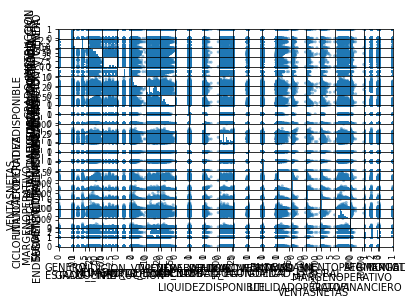

In [ ]:
# scatter plot matrix
scatter_matrix(desarrll)
plt.show()

In [ ]:
desarrll.describe() #Resumen de la información cuantitativa

,ID,GENERO,ESTADO_CIVIL,EDAD,GRADO_INSTRUCCION,CONDICION_VIVIENDA,NUMERO_DEPENDIENTES,DPTO_DOMICILIO,ANTIGUEDAD_DOMICILIO,TIPO_TRABAJADOR,TIENE_VEHIVULO,LIQUIDEZDISPONIBLE,ACTIVIDAD_ECONOMICA,DEUDAS_NEGATIVAS,T_D_AC_VEN_MA30_3M,RT_N_ENT_M0_3M,ANTIGUEDAD_LABORAL,UTILIDADOPERATIVA,VENTASNETAS,ENDEUDAMIENTOPATRIMONIAL,MARGENOPERATIVO,CICLOFINANCIERO,SEGMENTO,TARGET
count,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000
mean,4243.500000,0.494108,1.676997,38.117723,0.936719,1.396300,1.301084,12.319939,11.737450,0.943790,0.068584,878.784709,11.084846,0.011195,0.241692,0.049022,5.981028,1392.998193,6780.685292,0.238119,32.351594,47.384088,2.109474,0.089559
std,2449.841525,0.499995,0.740896,12.554529,1.320480,0.668003,1.136823,6.077290,8.998206,0.230341,0.252760,1149.363821,7.121944,0.105218,0.428134,0.215927,4.575021,1443.808608,10845.418902,0.183900,18.951204,162.217300,0.756297,0.285566
min,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-290.000000,360.000000,0.010000,-24.160000,-690.580000,1.000000,0.000000
25%,2122.250000,0.000000,2.000000,28.000000,0.000000,1.000000,0.000000,5.000000,5.000000,1.000000,0.000000,380.022500,4.000000,0.000000,0.000000,0.000000,5.000000,736.000000,2400.000000,0.220000,18.120000,16.212500,2.000000,0.000000
50%,4243.500000,0.000000,2.000000,37.000000,0.000000,1.000000,1.000000,13.000000,10.000000,1.000000,0.000000,605.000000,10.000000,0.000000,0.000000,0.000000,5.000000,1097.600000,4036.000000,0.220000,27.980000,30.000000,2.000000,0.000000
75%,6364.750000,1.000000,2.000000,47.000000,2.000000,2.000000,2.000000,18.000000,16.000000,1.000000,0.000000,996.187500,15.000000,0.000000,0.000000,0.000000,5.000000,1660.150000,7200.000000,0.220000,42.965000,47.700000,3.000000,0.000000
max,8486.000000,1.000000,3.000000,80.000000,4.000000,2.000000,11.000000,23.000000,66.000000,1.000000,1.000000,55725.000000,27.000000,1.000000,1.000000,1.000000,57.000000,69165.000000,364000.000000,7.200000,97.610000,11637.930000,3.000000,1.000000


In [ ]:
#Variables numericas
columnas_numericas = ['EDAD','NUMERO_DEPENDIENTES','ANTIGUEDAD_DOMICILIO','LIQUIDEZDISPONIBLE','DEUDAS_NEGATIVAS','T_D_AC_VEN_MA30_3M','RT_N_ENT_M0_3M','ANTIGUEDAD_LABORAL','UTILIDADOPERATIVA', 'VENTASNETAS', 'ENDEUDAMIENTOPATRIMONIAL',
       'MARGENOPERATIVO', 'CICLOFINANCIERO', 'SEGMENTO']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe22c882320>,
      dtype=object)

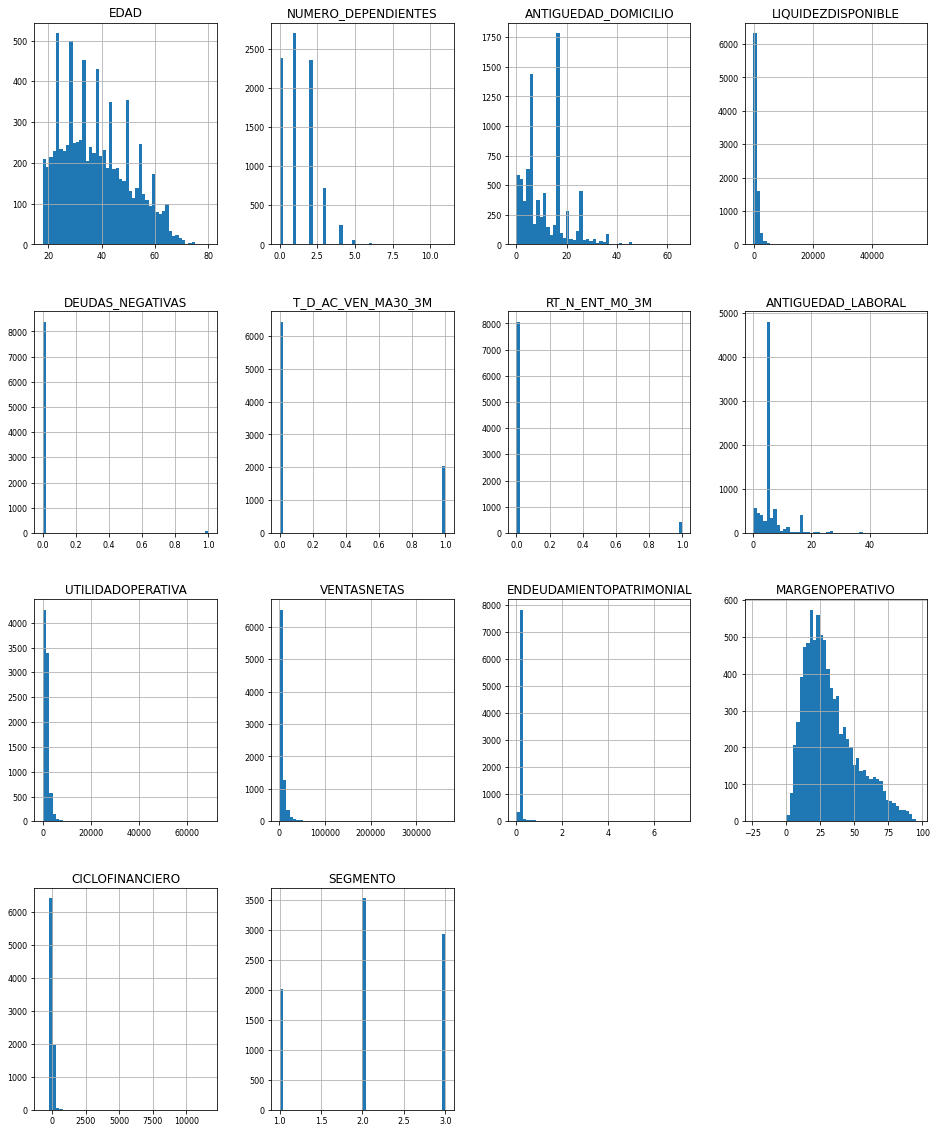

In [ ]:
desarrll[columnas_numericas].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

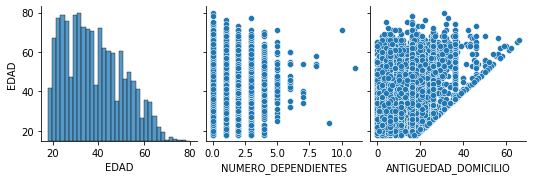

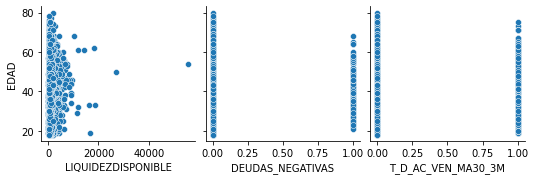

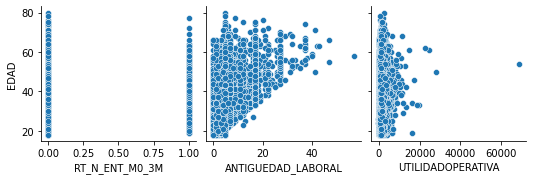

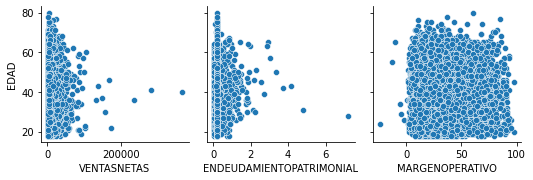

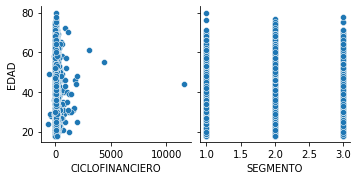

In [ ]:
for i in range(0, len(desarrll[columnas_numericas].columns), 3):
    sns.pairplot(data=desarrll[columnas_numericas],
                x_vars=desarrll[columnas_numericas].columns[i:i+3],
                y_vars=['EDAD'])

### 6.Visualizacion de valores missings

In [ ]:
# Importamos librerias
import numpy as np
import pandas as pd

# Para graficas
import seaborn as sns
import matplotlib.pyplot as plt

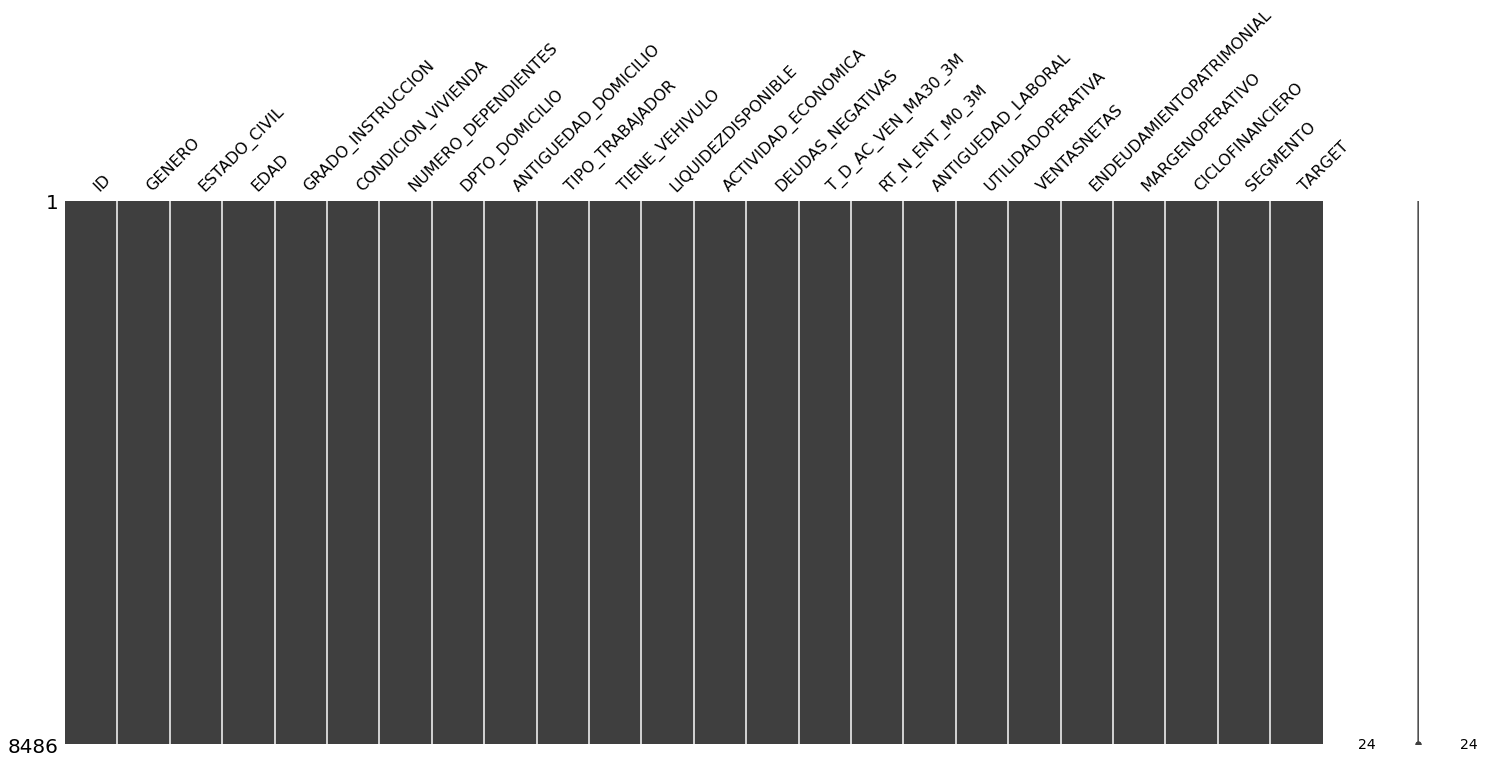

In [ ]:
# Usando libreria missingno
import missingno as msno

msno.matrix(desarrll)

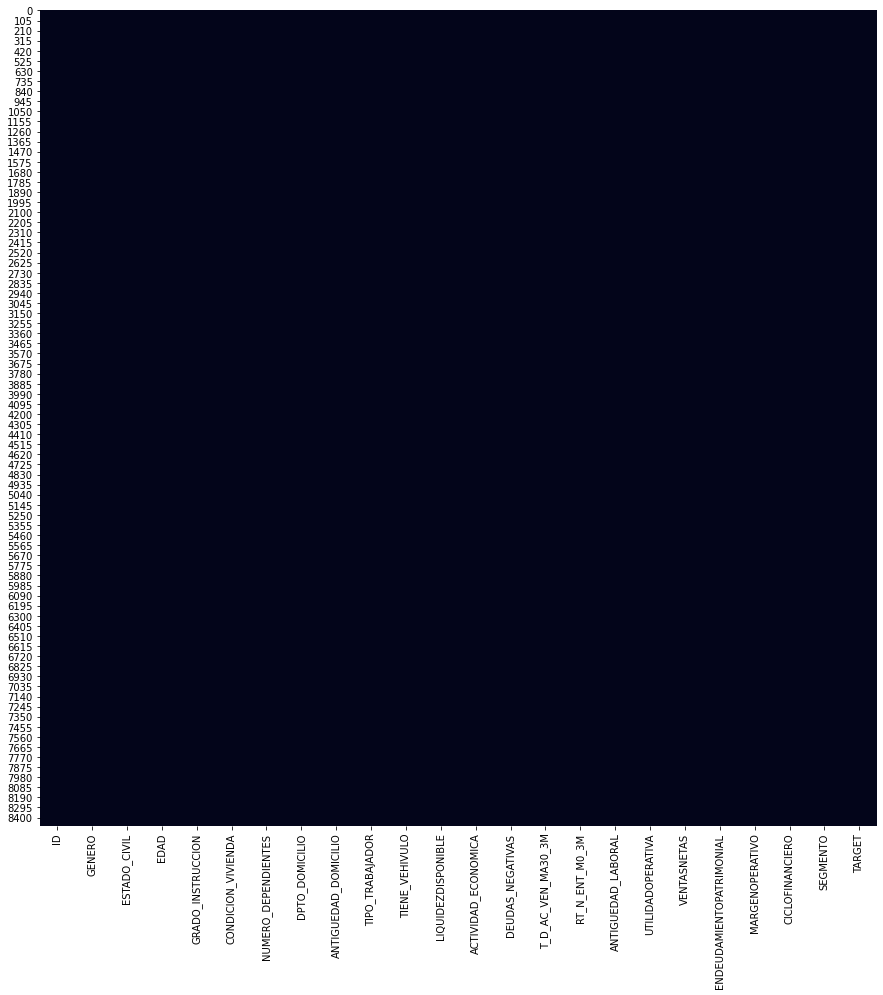

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,15))
fig.subplots_adjust(wspace = 0.1)

ax1 = sns.heatmap(desarrll.isnull(), cbar=False)

### 7.Tratamiento de valores missings

In [ ]:
desarrll.isnull().sum()

ID                          0
GENERO                      0
ESTADO_CIVIL                0
EDAD                        0
GRADO_INSTRUCCION           0
CONDICION_VIVIENDA          0
NUMERO_DEPENDIENTES         0
DPTO_DOMICILIO              0
ANTIGUEDAD_DOMICILIO        0
TIPO_TRABAJADOR             0
TIENE_VEHIVULO              0
LIQUIDEZDISPONIBLE          0
ACTIVIDAD_ECONOMICA         0
DEUDAS_NEGATIVAS            0
T_D_AC_VEN_MA30_3M          0
RT_N_ENT_M0_3M              0
ANTIGUEDAD_LABORAL          0
UTILIDADOPERATIVA           0
VENTASNETAS                 0
ENDEUDAMIENTOPATRIMONIAL    0
MARGENOPERATIVO             0
CICLOFINANCIERO             0
SEGMENTO                    0
TARGET                      0
dtype: int64

### 8.Particion Muestral

[Modeling](ttps://es.quora.com/Qu%C3%A9-es-el-escenario-de-entrenamiento-validaci%C3%B3n-y-prueba-de-conjuntos-de-datos-en-aprendizaje-autom%C3%A1tico)

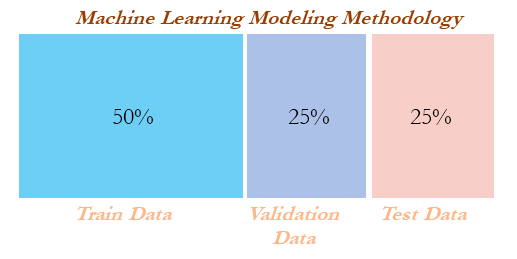

In [ ]:
# Le quitamos la variable Loan_ID o identificador único para poder modelar la información
desarrll = desarrll.drop('ID', axis=1) # Axis=1


In [ ]:
desarrll.head(5)

,GENERO,ESTADO_CIVIL,EDAD,GRADO_INSTRUCCION,CONDICION_VIVIENDA,NUMERO_DEPENDIENTES,DPTO_DOMICILIO,ANTIGUEDAD_DOMICILIO,TIPO_TRABAJADOR,TIENE_VEHIVULO,LIQUIDEZDISPONIBLE,ACTIVIDAD_ECONOMICA,DEUDAS_NEGATIVAS,T_D_AC_VEN_MA30_3M,RT_N_ENT_M0_3M,ANTIGUEDAD_LABORAL,UTILIDADOPERATIVA,VENTASNETAS,ENDEUDAMIENTOPATRIMONIAL,MARGENOPERATIVO,CICLOFINANCIERO,SEGMENTO,TARGET
0,0,2,38,0,2,2,13,16,1,0,1139.00,2,0,0,0,16,1895.00,7960.0,0.22,26.91,59.67,2,0
1,0,2,39,0,2,2,14,4,1,0,2877.37,17,0,0,0,5,3957.37,1480.0,0.22,29.98,65.21,3,0
2,1,0,46,2,2,3,5,26,1,0,888.00,10,0,0,0,5,1338.00,2880.0,0.22,24.77,30.00,1,0
3,0,2,23,3,1,0,12,16,1,0,2373.00,10,0,0,0,5,3350.00,1800.0,0.22,72.82,25.80,3,0
4,0,0,34,0,1,3,14,16,1,0,1353.06,2,0,0,0,5,2003.60,82800.0,0.22,17.27,8.77,3,0


In [ ]:
desarrll.TARGET.value_counts()

0    7726
1     760
Name: TARGET, dtype: int64

#### 8.1 Division de los datos train/test 70/30

In [ ]:
## Si deseamos balancear, podemos hacerlo con toda la informacion?
# Creación de la data de train y la data de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(desarrll.drop('TARGET', axis=1),
                                                    desarrll['TARGET'],
                                                    test_size=0.30,
                                                    stratify=desarrll['TARGET'],
                                                    random_state=100)

In [ ]:
X_train.dtypes

GENERO                        int64
ESTADO_CIVIL                  int64
EDAD                          int64
GRADO_INSTRUCCION             int64
CONDICION_VIVIENDA            int64
NUMERO_DEPENDIENTES           int64
DPTO_DOMICILIO                int64
ANTIGUEDAD_DOMICILIO          int64
TIPO_TRABAJADOR               int64
TIENE_VEHIVULO                int64
LIQUIDEZDISPONIBLE          float64
ACTIVIDAD_ECONOMICA           int64
DEUDAS_NEGATIVAS              int64
T_D_AC_VEN_MA30_3M            int64
RT_N_ENT_M0_3M                int64
ANTIGUEDAD_LABORAL            int64
UTILIDADOPERATIVA           float64
VENTASNETAS                 float64
ENDEUDAMIENTOPATRIMONIAL    float64
MARGENOPERATIVO             float64
CICLOFINANCIERO             float64
SEGMENTO                      int64
dtype: object

In [ ]:
y_train.dtypes

dtype('int64')

In [ ]:
train=pd.concat([X_train, y_train], axis=1)
train.head()

,GENERO,ESTADO_CIVIL,EDAD,GRADO_INSTRUCCION,CONDICION_VIVIENDA,NUMERO_DEPENDIENTES,DPTO_DOMICILIO,ANTIGUEDAD_DOMICILIO,TIPO_TRABAJADOR,TIENE_VEHIVULO,LIQUIDEZDISPONIBLE,ACTIVIDAD_ECONOMICA,DEUDAS_NEGATIVAS,T_D_AC_VEN_MA30_3M,RT_N_ENT_M0_3M,ANTIGUEDAD_LABORAL,UTILIDADOPERATIVA,VENTASNETAS,ENDEUDAMIENTOPATRIMONIAL,MARGENOPERATIVO,CICLOFINANCIERO,SEGMENTO,TARGET
189,1,0,35,0,2,2,14,16,1,0,2100.00,10,0,0,1,5,2480.00,5016.0,0.22,3.10,32.00,3,0
3390,0,0,59,0,2,2,13,11,1,0,437.55,24,0,0,0,5,1427.55,3100.0,0.22,46.05,43.40,2,0
5210,0,2,47,0,0,0,12,8,1,0,477.00,2,0,0,0,9,842.00,4080.0,0.22,20.63,31.61,3,0
5946,0,0,43,3,1,0,14,16,1,0,2075.00,7,0,1,0,7,2590.00,19600.0,0.22,13.21,17.49,3,0
1395,0,2,23,3,1,0,10,5,1,0,453.60,24,0,1,0,5,1198.60,7500.0,0.22,37.93,68.80,2,0


In [ ]:
# Puedo corroborar que en mi data de train sigo teniendo el desbalance
train.TARGET.value_counts()

0    5408
1     532
Name: TARGET, dtype: int64

### 9.Balanceo de datos

#### 9.1 Remuestreo

Clase 0: 5408
Clase 1: 532
Proportion Clase 0: 0.91 : 0
Proportion Clase 1: 0.09 : 1


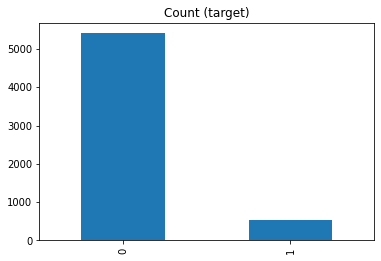

In [ ]:
## Podemos hacer el balanceo de manera artesanal , para entender las lógicas.

import numpy as np
import pandas as pd
import seaborn as sns

target_count = train.TARGET.value_counts()
print('Clase 0:', target_count[0])
print('Clase 1:', target_count[1])

print('Proportion Clase 0:', round(target_count[0] / (target_count[0]+target_count[1]), 2), ': 0')
print('Proportion Clase 1:', round(target_count[1] / (target_count[0]+target_count[1]), 2), ': 1')


target_count.plot(kind='bar', title='Count (target)');


In [ ]:
# Conteo de las Clases
# La clase 1 es la de los préstamos otorgados , tenemos 532 préstamos otorgados
# La clase 0 es la de los préstamos no otorgados , tenemos 5408 préstamos no otorgados
count_class_1,count_class_0 = train.TARGET.value_counts()

# Dividimos las Clases
df_class_0 = train[train['TARGET'] == 0]
df_class_1 = train[train['TARGET'] == 1]

## Podemos visualizar el contenido del objeto df_class_1.head(5)

In [ ]:
count_class_1,count_class_0 = train.TARGET.value_counts()
count_class_1


5408

In [ ]:
#Clase 1: 532
#count_class_0 =532
df_class_1.head(5)

,GENERO,ESTADO_CIVIL,EDAD,GRADO_INSTRUCCION,CONDICION_VIVIENDA,NUMERO_DEPENDIENTES,DPTO_DOMICILIO,ANTIGUEDAD_DOMICILIO,TIPO_TRABAJADOR,TIENE_VEHIVULO,LIQUIDEZDISPONIBLE,ACTIVIDAD_ECONOMICA,DEUDAS_NEGATIVAS,T_D_AC_VEN_MA30_3M,RT_N_ENT_M0_3M,ANTIGUEDAD_LABORAL,UTILIDADOPERATIVA,VENTASNETAS,ENDEUDAMIENTOPATRIMONIAL,MARGENOPERATIVO,CICLOFINANCIERO,SEGMENTO,TARGET
7244,M,S,36,MEDIO/SECUNDARIA,DE FAMILIAR,3,AMAZONAS,16,INDEPENDIENTE,False,615.0,OTRAS ACTIVIDADES,0,0,0,7,935.0,3625.0,0.22,25.79,188.11,1,1
6818,M,S,37,MEDIO/SECUNDARIA,PROPIO,2,PIURA,6,INDEPENDIENTE,False,650.0,CULTIVOS AGRICOLAS,0,0,0,7,1500.0,3200.0,0.22,46.87,37.50,2,1
1678,F,S,38,MEDIO/SECUNDARIA,DE FAMILIAR,1,LA LIBERTAD,6,INDEPENDIENTE,False,982.0,OTRAS ACTIVIDADES,0,0,0,5,1580.0,1820.0,0.22,31.60,30.00,3,1
6921,F,S,24,TECNICO,DE FAMILIAR,1,LIMA,16,INDEPENDIENTE,False,1063.9,PELUQUERIA,0,1,0,3,2994.4,9120.0,0.11,32.83,46.68,3,1
3348,M,S,41,TECNICO,ALQUILADO,0,ICA,6,INDEPENDIENTE,False,258.0,VENTA DE VERDURAS Y FRUTAS,0,0,0,5,1413.0,3440.0,0.22,41.07,4.75,2,1


In [ ]:
#Clase 0: 5408
#count_class_1 =5408
df_class_0.head(5)

,GENERO,ESTADO_CIVIL,EDAD,GRADO_INSTRUCCION,CONDICION_VIVIENDA,NUMERO_DEPENDIENTES,DPTO_DOMICILIO,ANTIGUEDAD_DOMICILIO,TIPO_TRABAJADOR,TIENE_VEHIVULO,LIQUIDEZDISPONIBLE,ACTIVIDAD_ECONOMICA,DEUDAS_NEGATIVAS,T_D_AC_VEN_MA30_3M,RT_N_ENT_M0_3M,ANTIGUEDAD_LABORAL,UTILIDADOPERATIVA,VENTASNETAS,ENDEUDAMIENTOPATRIMONIAL,MARGENOPERATIVO,CICLOFINANCIERO,SEGMENTO,TARGET
189,M,C,35,MEDIO/SECUNDARIA,PROPIO,2,LIMA,16,INDEPENDIENTE,False,2100.00,OTRAS ACTIVIDADES,0,0,1,5,2480.00,5016.0,0.22,3.10,32.00,3,0
3390,F,C,59,MEDIO/SECUNDARIA,PROPIO,2,LAMBAYEQUE,11,INDEPENDIENTE,False,437.55,VENTA DE ROPA -TEXTILES,0,0,0,5,1427.55,3100.0,0.22,46.05,43.40,2,0
5210,F,S,47,MEDIO/SECUNDARIA,ALQUILADO,0,LA LIBERTAD,8,INDEPENDIENTE,False,477.00,BODEGAS,0,0,0,9,842.00,4080.0,0.22,20.63,31.61,3,0
5946,F,C,43,TECNICO,DE FAMILIAR,0,LIMA,16,INDEPENDIENTE,False,2075.00,FERRETERIA,0,1,0,7,2590.00,19600.0,0.22,13.21,17.49,3,0
1395,F,S,23,TECNICO,DE FAMILIAR,0,ICA,5,INDEPENDIENTE,False,453.60,VENTA DE ROPA -TEXTILES,0,1,0,5,1198.60,7500.0,0.22,37.93,68.80,2,0


In [ ]:
# Definimos una nueva variable llamada df_class_1_under la cual nos da un muestreo de la clase 1 dependiendo del número de
# elementos de la clase 0.
#df_class_0=5408 ceros
#count_class_1=5408 ceros

df_class_1_under = df_class_0.sample(count_class_1)
df_class_1_under

,GENERO,ESTADO_CIVIL,EDAD,GRADO_INSTRUCCION,CONDICION_VIVIENDA,NUMERO_DEPENDIENTES,DPTO_DOMICILIO,ANTIGUEDAD_DOMICILIO,TIPO_TRABAJADOR,TIENE_VEHIVULO,LIQUIDEZDISPONIBLE,ACTIVIDAD_ECONOMICA,DEUDAS_NEGATIVAS,T_D_AC_VEN_MA30_3M,RT_N_ENT_M0_3M,ANTIGUEDAD_LABORAL,UTILIDADOPERATIVA,VENTASNETAS,ENDEUDAMIENTOPATRIMONIAL,MARGENOPERATIVO,CICLOFINANCIERO,SEGMENTO,TARGET
4381,M,C,30,MEDIO/SECUNDARIA,PROPIO,2,PIURA,16,INDEPENDIENTE,False,1260.00,VENTA DE VERDURAS Y FRUTAS,0,0,0,5,1980.00,18000.0,0.22,11.00,12.00,2,0
4176,F,S,37,MEDIO/SECUNDARIA,PROPIO,1,CUSCO,2,INDEPENDIENTE,False,1420.00,VENTA DE ROPA -TEXTILES,0,0,0,5,1890.00,6000.0,0.22,31.50,84.13,3,0
2566,F,S,23,MEDIO/SECUNDARIA,DE FAMILIAR,0,LAMBAYEQUE,21,INDEPENDIENTE,False,235.00,VENTA DE ROPA -TEXTILES,0,0,0,5,390.00,21550.0,0.22,13.92,13.13,2,0
3426,F,S,28,PRIMARIA,DE FAMILIAR,2,LAMBAYEQUE,6,INDEPENDIENTE,False,2160.00,BODEGAS,0,0,0,6,2910.00,8200.0,1.48,35.48,56.47,2,0
2312,M,S,36,UNIVERSITRARIO,DE FAMILIAR,0,SAN MARTIN,1,DEPENDIENTE,False,891.60,OTRAS ACTIVIDADES,0,1,0,5,1320.00,7650.0,0.16,52.80,30.00,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8317,F,C,61,MEDIO/SECUNDARIA,PROPIO,0,PIURA,20,INDEPENDIENTE,True,417.00,ABARROTE,0,0,1,22,832.00,5200.0,0.22,16.00,16.58,2,0
2912,M,S,29,TECNICO,PROPIO,1,SAN MARTIN,5,INDEPENDIENTE,False,510.00,OTRAS ACTIVIDADES,0,1,0,5,497.50,3000.0,0.22,16.58,33.33,2,0
4429,M,C,39,TECNICO,PROPIO,0,LAMBAYEQUE,22,DEPENDIENTE,False,1199.00,OTRAS ACTIVIDADES,0,1,0,5,1774.00,3080.0,0.22,57.59,30.00,2,0
1929,M,S,51,MEDIO/SECUNDARIA,PROPIO,5,CUSCO,6,INDEPENDIENTE,False,739.37,TRANSPORTE,0,0,0,5,1436.87,3400.0,0.22,52.36,11.68,3,0


#### 9.2 UnderSample

In [ ]:
import imblearn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True) # Define o instancian
X_rus, y_rus, id_rus = rus.fit_sample(X_train, y_train)   # Ejecuto

In [ ]:
df_X_rus = pd.DataFrame(data=X_rus,columns=X_train.columns)
df_y_rus = pd.DataFrame(data=y_rus,columns=['TARGET'])

# Concatenamos la información
df_balanceado_rus = pd.concat([df_X_rus, df_y_rus], axis=1)

In [ ]:
df_balanceado_rus.TARGET.value_counts()

1    532
0    532
Name: TARGET, dtype: int64

#### 9.3 OverSample

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()            # Define o instancia
X_ros, y_ros = ros.fit_sample(X_train, y_train)  # Ejecuto

df_X_ros = pd.DataFrame(data=X_ros,columns=X_train.columns)
df_y_ros = pd.DataFrame(data=y_ros,columns=['TARGET'])

# Concatenamos la información
df_balanceado_ros = pd.concat([df_X_ros, df_y_ros], axis=1)

In [ ]:
df_balanceado_ros.TARGET.value_counts()

1    5408
0    5408
Name: TARGET, dtype: int64

#### 9.4 Tomeklink

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority') # Instancia o defines
X_tl, y_tl,id_tl  = tl.fit_sample(X_train, y_train)                # Aplicar

df_X_tl = pd.DataFrame(data=X_tl,columns=X_train.columns)
df_y_tl = pd.DataFrame(data=y_tl,columns=["TARGET"])

# Concatenamos la información
df_balanceado_tl = pd.concat([df_X_tl, df_y_tl], axis=1)

In [ ]:
df_balanceado_tl.TARGET.value_counts()

0    5137
1     532
Name: TARGET, dtype: int64

#### 9.5 Balenceo de Datos ClusterCentroids

In [ ]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={1: 200})        # Instancio
X_cc, y_cc = cc.fit_sample(X_train, y_train) # Ajusto

df_X_cc = pd.DataFrame(data=X_cc,columns=X_train.columns)
df_y_cc = pd.DataFrame(data=y_cc,columns=["TARGET"])

# Concatenamos la información
df_balanceado_cc = pd.concat([df_X_cc, df_y_cc], axis=1)

In [ ]:
df_balanceado_cc.TARGET.value_counts()

0    5408
1     200
Name: TARGET, dtype: int64

#### 9.6 Smote

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)

df_X_sm = pd.DataFrame(data=X_sm,columns=X_train.columns)
df_y_sm = pd.DataFrame(data=y_sm,columns=["TARGET"])

# Concatenamos la información
df_balanceado_sm = pd.concat([df_X_sm, df_y_sm], axis=1)

In [ ]:
df_balanceado_sm.TARGET.value_counts()

1    5408
0    5408
Name: TARGET, dtype: int64

#### 9.7 SmoteTomek

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X_train, y_train)

df_X_smt = pd.DataFrame(data=X_smt,columns=X_train.columns)
df_y_smt = pd.DataFrame(data=y_smt,columns=["TARGET"])

# Concatenamos la información
df_balanceado_smt = pd.concat([df_X_smt, df_y_smt], axis=1)

In [ ]:
df_balanceado_smt.TARGET.value_counts()

1    5172
0    5172
Name: TARGET, dtype: int64

### 10.Selección de Drivers

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
desarrll.shape

(8486, 23)

In [ ]:
desarrll.head(5)

,GENERO,ESTADO_CIVIL,EDAD,GRADO_INSTRUCCION,CONDICION_VIVIENDA,NUMERO_DEPENDIENTES,DPTO_DOMICILIO,ANTIGUEDAD_DOMICILIO,TIPO_TRABAJADOR,TIENE_VEHIVULO,LIQUIDEZDISPONIBLE,ACTIVIDAD_ECONOMICA,DEUDAS_NEGATIVAS,T_D_AC_VEN_MA30_3M,RT_N_ENT_M0_3M,ANTIGUEDAD_LABORAL,UTILIDADOPERATIVA,VENTASNETAS,ENDEUDAMIENTOPATRIMONIAL,MARGENOPERATIVO,CICLOFINANCIERO,SEGMENTO,TARGET
0,0,2,38,0,2,2,13,16,1,0,1139.00,2,0,0,0,16,1895.00,7960.0,0.22,26.91,59.67,2,0
1,0,2,39,0,2,2,14,4,1,0,2877.37,17,0,0,0,5,3957.37,1480.0,0.22,29.98,65.21,3,0
2,1,0,46,2,2,3,5,26,1,0,888.00,10,0,0,0,5,1338.00,2880.0,0.22,24.77,30.00,1,0
3,0,2,23,3,1,0,12,16,1,0,2373.00,10,0,0,0,5,3350.00,1800.0,0.22,72.82,25.80,3,0
4,0,0,34,0,1,3,14,16,1,0,1353.06,2,0,0,0,5,2003.60,82800.0,0.22,17.27,8.77,3,0


In [ ]:
### Utilizamos la información obtenida con el balanceo mediante la metodología SMOTE
df_balanceado_ros.head(3)
#X_sm.shape
#y_sm.shape

,GENERO,ESTADO_CIVIL,EDAD,GRADO_INSTRUCCION,CONDICION_VIVIENDA,NUMERO_DEPENDIENTES,DPTO_DOMICILIO,ANTIGUEDAD_DOMICILIO,TIPO_TRABAJADOR,TIENE_VEHIVULO,LIQUIDEZDISPONIBLE,ACTIVIDAD_ECONOMICA,DEUDAS_NEGATIVAS,T_D_AC_VEN_MA30_3M,RT_N_ENT_M0_3M,ANTIGUEDAD_LABORAL,UTILIDADOPERATIVA,VENTASNETAS,ENDEUDAMIENTOPATRIMONIAL,MARGENOPERATIVO,CICLOFINANCIERO,SEGMENTO,TARGET
0,1.0,0.0,35.0,0.0,2.0,2.0,14.0,16.0,1.0,0.0,2100.00,10.0,0.0,0.0,1.0,5.0,2480.00,5016.0,0.22,3.10,32.00,3.0,0
1,0.0,0.0,59.0,0.0,2.0,2.0,13.0,11.0,1.0,0.0,437.55,24.0,0.0,0.0,0.0,5.0,1427.55,3100.0,0.22,46.05,43.40,2.0,0
2,0.0,2.0,47.0,0.0,0.0,0.0,12.0,8.0,1.0,0.0,477.00,2.0,0.0,0.0,0.0,9.0,842.00,4080.0,0.22,20.63,31.61,3.0,0


In [ ]:
df_balanceado_ros.columns

Index(['GENERO', 'ESTADO_CIVIL', 'EDAD', 'GRADO_INSTRUCCION',
       'CONDICION_VIVIENDA', 'NUMERO_DEPENDIENTES', 'DPTO_DOMICILIO',
       'ANTIGUEDAD_DOMICILIO', 'TIPO_TRABAJADOR', 'TIENE_VEHIVULO',
       'LIQUIDEZDISPONIBLE', 'ACTIVIDAD_ECONOMICA', 'DEUDAS_NEGATIVAS',
       'T_D_AC_VEN_MA30_3M', 'RT_N_ENT_M0_3M', 'ANTIGUEDAD_LABORAL',
       'UTILIDADOPERATIVA', 'VENTASNETAS', 'ENDEUDAMIENTOPATRIMONIAL',
       'MARGENOPERATIVO', 'CICLOFINANCIERO', 'SEGMENTO', 'TARGET'],
      dtype='object')

In [ ]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_ros, y_ros)
# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_*100)

# horizontal bar plot of feature importance
pos = np.arange(15) + 0.5
plt.barh(pos, fit.scores_, align='center')
plt.title("Feature Importance")
plt.xlabel("Model chi2")
plt.ylabel("Features")
plt.yticks(pos, ('GENERO', 'ESTADO_CIVIL', 'EDAD', 'GRADO_INSTRUCCION',
       'CONDICION_VIVIENDA', 'NUMERO_DEPENDIENTES', 'DPTO_DOMICILIO',
       'ANTIGUEDAD_DOMICILIO', 'TIPO_TRABAJADOR', 'TIENE_VEHIVULO',
       'LIQUIDEZDISPONIBLE', 'ACTIVIDAD_ECONOMICA', 'DEUDAS_NEGATIVAS',
       'T_D_AC_VEN_MA30_3M', 'RT_N_ENT_M0_3M', 'ANTIGUEDAD_LABORAL',
       'UTILIDADOPERATIVA', 'VENTASNETAS', 'ENDEUDAMIENTOPATRIMONIAL',
       'MARGENOPERATIVO', 'CICLOFINANCIERO', 'SEGMENTO'))
plt.grid(True)

ValueError: ignored

#### 10.1 Selección por Random forest

In [ ]:
# Seleccion por Random Forest
from sklearn.ensemble import RandomForestClassifier # Paso01: Instancio el algoritmo

forest = RandomForestClassifier()   # Paso02: Configuro el algoritmo
forest.fit(X_train, y_train)        # Paso03: Ajuste el algoritmo
importances = forest.feature_importances_ # Variables importantes

In [ ]:
importances

array([0.01724759, 0.01091461, 0.08692391, 0.02418075, 0.02095585,
       0.03847753, 0.057916  , 0.06376957, 0.00684601, 0.00638567,
       0.10436244, 0.05599873, 0.00410361, 0.01204951, 0.00766811,
       0.04619328, 0.10315591, 0.09310041, 0.02376987, 0.10435027,
       0.0914898 , 0.02014056])

In [ ]:
# Seleccion por Random Forest
TablaImportancia = pd.concat([pd.DataFrame({'Driver':list(X_train.columns)}),
                              pd.DataFrame({'Importancia':list(forest.feature_importances_)})], axis = 1)
ImportanciaVariables = TablaImportancia[['Driver','Importancia']].sort_values('Importancia', ascending = False).reset_index(drop = True)
ImportanciaVariables

,Driver,Importancia
0,LIQUIDEZDISPONIBLE,0.104362
1,MARGENOPERATIVO,0.104350
2,UTILIDADOPERATIVA,0.103156
3,VENTASNETAS,0.093100
4,CICLOFINANCIERO,0.091490
5,EDAD,0.086924
6,ANTIGUEDAD_DOMICILIO,0.063770
7,DPTO_DOMICILIO,0.057916
8,ACTIVIDAD_ECONOMICA,0.055999
9,ANTIGUEDAD_LABORAL,0.046193


#### 10.2 Selección por Boruta

In [ ]:
# Instalamos Boruta
! pip install Boruta

     |████████████████████████████████| 61kB 7.5MB/s 


In [ ]:
# Seleccion Boruta (Permutaciones de arboles)
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

rfc = RandomForestClassifier()
boruta_selector = BorutaPy(rfc, n_estimators='auto',verbose=2)

x=X_train.values
y=y_train.values

boruta_selector.fit(x,y)

print("==============BORUTA==============")
print (boruta_selector.n_features_)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	0
Rejected: 	22


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	0
Rejected: 	22
==============BORUTA==============
0


In [ ]:
# Observamos cual de las variables el algoritmo eligio
X_train_Bor = X_train.columns[boruta_selector.support_]

In [ ]:
X_train.head()

,GENERO,ESTADO_CIVIL,EDAD,GRADO_INSTRUCCION,CONDICION_VIVIENDA,NUMERO_DEPENDIENTES,DPTO_DOMICILIO,ANTIGUEDAD_DOMICILIO,TIPO_TRABAJADOR,TIENE_VEHIVULO,LIQUIDEZDISPONIBLE,ACTIVIDAD_ECONOMICA,DEUDAS_NEGATIVAS,T_D_AC_VEN_MA30_3M,RT_N_ENT_M0_3M,ANTIGUEDAD_LABORAL,UTILIDADOPERATIVA,VENTASNETAS,ENDEUDAMIENTOPATRIMONIAL,MARGENOPERATIVO,CICLOFINANCIERO,SEGMENTO
189,1,0,35,0,2,2,14,16,1,0,2100.00,10,0,0,1,5,2480.00,5016.0,0.22,3.10,32.00,3
3390,0,0,59,0,2,2,13,11,1,0,437.55,24,0,0,0,5,1427.55,3100.0,0.22,46.05,43.40,2
5210,0,2,47,0,0,0,12,8,1,0,477.00,2,0,0,0,9,842.00,4080.0,0.22,20.63,31.61,3
5946,0,0,43,3,1,0,14,16,1,0,2075.00,7,0,1,0,7,2590.00,19600.0,0.22,13.21,17.49,3
1395,0,2,23,3,1,0,10,5,1,0,453.60,24,0,1,0,5,1198.60,7500.0,0.22,37.93,68.80,2


In [ ]:
X_train_Bor

Index([], dtype='object')

In [ ]:
# Si deseamos , podemos elegir las variables mas importantes
X_train_subset =X_train[["Credit_History","Cuota_Ingreso1","Cuota_Ingreso_Hijo","LoanAmount"]]

In [ ]:
X_train_subset.head(3)